<center><h1>Inteligencia Artificial</header1></center>

Presentado por: Nombres Apellidos  <br>
Fecha: DD/MM/2022

# Importación de librerias necesarias

In [55]:
#Para esta actividad se importarán las siguientes librerías:
#Importamos la libreria pandas
import pandas as pd
#Importamos la libreria numpy
import numpy as np
#Importar la libreria StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# import libraries for decision tree visualization
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

## Cargar el Dataset

In [4]:
#Código para cargar el Dataset
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Descripción de la fuente del Dataset

Haga una descripción de la fuente de dayos utilizada (Incluya los enlaces necesarios).

**Variables de salida Y**

target : 0 = menos probabilidad de ataque cardíaco 1 = más probabilidad de ataque cardíaco

**Variables de entrada X**

Age: Edad del paciente

Sex : Sexo del paciente

exang: angina inducida por el ejercicio (1 = sí; 0 = no)

ca: número de buques principales (0-3)

cp : Dolor torácico tipo dolor torácico tipo dolor

--Valor 1: angina típica

--Valor 2: angina atípica

--Valor 3: dolor no anginoso

--Valor 4: asintomático

trtbps : presión arterial en reposo (en mm Hg)

chol : colestoral en mg/dl obtenido a través del sensor de IMC

fbs : (azúcar en sangre en ayunas > 120 mg/dl) (1 = verdadero; 0 = falso)

rest_ecg : resultados electrocardiográficos en reposo

--Valor 0: normal

--Valor 1: tener anormalidad de la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST de > 0,05 mV)

--Valor 2: mostrar hipertrofia ventricular izquierda probable o definida según los criterios de Estes

thalach : frecuencia cardíaca máxima alcanzada



## Explique el problema a resolver. 
Descripción del problema. Tipo de problema (justifique). Variable objetivo, variables de entrada. Utilidad de su posible solución. Elementos adicionales que considere relevantes (no son necesarios contenidos teóricos, sino explicar qué relaciones tratas de comprobar y con qué métodos).

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


In [3]:
#Código que responde a la descripción anterior
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#Código que responde a la descripción anterior
#Imprimir mensaje
print("Número de instancias en total:")
#Contar las instancias del dataset
data.count()

Número de instancias en total:


age         1587
sex         1587
cp          1587
trtbps      1587
chol        1587
fbs         1587
restecg     1587
thalachh    1587
exng        1587
oldpeak     1587
slp         1587
caa         1587
thall       1587
output      1587
dtype: int64

In [6]:
#Número de atributos de entrada, su significado y tipo
#Muestra informacion de los datos de entrada
data.drop('output', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1587 non-null   int64  
 1   sex       1587 non-null   int64  
 2   cp        1587 non-null   int64  
 3   trtbps    1587 non-null   int64  
 4   chol      1587 non-null   int64  
 5   fbs       1587 non-null   int64  
 6   restecg   1587 non-null   int64  
 7   thalachh  1587 non-null   int64  
 8   exng      1587 non-null   int64  
 9   oldpeak   1587 non-null   float64
 10  slp       1587 non-null   int64  
 11  caa       1587 non-null   int64  
 12  thall     1587 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 161.3 KB


In [7]:
#Estadísticas de la variable objetivo.
#Preparación para la estaditica de variable objetivo
salida = data['output']
#Presentacion de la variable objetivo
salida.describe()

count    1587.000000
mean        0.605545
std         0.488887
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: output, dtype: float64

<AxesSubplot:>

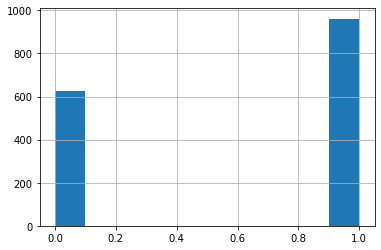

In [9]:
#Crea gráfico de barras como la variable objetivo continua.
data['output'].hist()

En un par de párrafos haga un resumen de los principales hallazagos encontrados:    

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [25]:
#Transformación de las caracteristicas (mire el apartado Feature engineering del aula virtual)
# Define la variable objetivo 
Variable_Objetivo=['output']
# Define las variables de entrada
Variables_Entrada=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']

In [32]:
# Asignamos a X las variables de entrada
X=data[Variables_Entrada].values
# Asignamos a y la variable objetivo
y=data[Variable_Objetivo].values

In [33]:
### Estandarización de la data ###
# Definimos las variables de entradas escalar
VariablesEntradaScaler=StandardScaler()
# Definimos la variable objetivo escalar
VariableObjetivoScaler=StandardScaler()

In [34]:
#Alimentamos al modelo con la variable de entrada X
VariablesEntradaFit=VariablesEntradaScaler.fit(X)
#Alimentamos al modelo con la variable objetivo y
VariableObjetivoFit=VariableObjetivoScaler.fit(y)

In [35]:
#Generación de los valores estandarizados de X
X=VariablesEntradaFit.transform(X)
#Generación de los valores estandarizados de y
y=VariableObjetivoFit.transform(y)

## División del dataset en datos de entrenamiento y datos de test 

In [48]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
#Divida los datos en un conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Modelamiento

In [49]:
#Códo del modelo
# determine target (dependent) and feature (independent) variables
feature_cols = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']
X = data[feature_cols] # features
y = data.output # target

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [51]:
#Entrenamiento
# create Decision Tree classifier object
clf = DecisionTreeClassifier()
# train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
# predict the response for test dataset
y_pred = clf.predict(X_test)

In [52]:
#Test
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [56]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ataquecorazon.png')
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

In [53]:
# create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
# predict the response for test dataset
y_pred = clf.predict(X_test)
# compute model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8364779874213837


## Evaluación del Modelo

Construya un o dos párrafos con los principales hallazgos. Cómo está funcionando el modelo? Calidad en los resultados de predicción. 